## Assignment 2

In [1]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy import linalg
import scipy.optimize as spo
random.seed(1)


The formula for the logistic function $\sigma:\mathbb{R}\times \mathbb{R}^2\rightarrow \mathbb{R}$ is the following:
$$\sigma(x,\beta_1,\beta_2)=\frac{1}{1+e^{-\beta_1(x-\beta_2)}}
$$
Here $\beta_1$ and $\beta_2$ are two positive constants:
* $\beta_1$: controls the curve's steepness,
* $\beta_2$: slides the curve on the x-axis.



In [2]:
#### GRADED EXERCISE
# Define the function sigma
# input (x,beta_1,beta_2)
# output value of the corresponding logistic function


def sigma(x,beta_1,beta_2):
    sigma = 1/(1+np.exp(-beta_1*(x- beta_2)))
    return(sigma)


Test your function. Try to calculate <code>sigma(2,1,1)</code>. This should have value 0.7310585786300049.

In [3]:
sigma(2,1,1)

0.7310585786300049

In [4]:
'''Test-cell'''

'Test-cell'

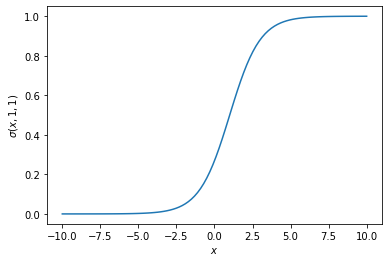

In [5]:
xvalues = np.linspace(-10,10,100)
yvalues = sigma(xvalues,1,1)

plt.plot(xvalues,yvalues)

plt.ylabel('$\sigma(x,1,1)$')
plt.xlabel('$x$')
plt.show()



So -- if you did well -- here is the graph of your logistic function for given $\beta=(1,1)$. You may also experiment with other values of $\beta_1,\beta_2$. 

Now consider the following situation. We know that the functional relationship between $x$ and $y$ is given by the logistic function $\sigma$, but we don't know the true $\beta_1$ and $\beta_2$. And what is even more disturbing, is that for given inputs $x$ we are given only inaccurate measurements $\sigma(x,\beta_1,\beta_2)$. This means that instead of $\sigma(x,\beta_1,\beta_2)$ we are given $\sigma(x,\beta_1,\beta_2)+\epsilon$ where $\epsilon$ is some random noise term. 

Find below the relevant data of $(x,y)$ values as summarized by <code>xdata</code> and <code>ydata</code>. These are lists. 

In [6]:
xdata=[ 0.26317961,  1.11033334,  2.16854045,  3.5879149 ,  7.39188879,
        8.27959386,  9.68184107, 11.00765078, 11.21504832, 14.12793326,
       15.57773256, 15.65724246, 16.84769716, 18.02335252, 19.13588775,
       20.43868663, 20.77180401, 21.29145905, 21.41469248, 21.43979042,
       24.97597543, 25.5751027 , 26.48366552, 27.20930143, 28.24374732,
       28.69837527, 29.1895221 , 30.44852441, 30.55106613, 30.71421093,
       30.75885892, 31.49290224, 31.53961788, 31.56541318, 31.96907739,
       36.36844079, 36.68593186, 38.49091299, 42.46127101, 42.83352138,
       43.65627717, 43.95391022, 44.59528147, 45.34353145, 48.98077847,
       49.15571848, 49.74482786, 52.90872105, 52.96573206, 54.11208861,
       54.75745599, 55.65916591, 56.5631469 , 57.13211501, 57.36438576,
       57.42833544, 61.06325169, 61.23223387, 62.41797233, 63.89478204,
       64.60907215, 65.26929143, 66.0839139 , 66.68079951, 66.97748063,
       68.49239969, 69.51520647, 70.6949448 , 71.87750528, 72.92466144,
       74.0781813 , 75.46696745, 75.57428558, 77.11523333, 77.62057875,
       77.74794312, 77.83262187, 79.34846742, 83.61762231, 83.88448342,
       84.18980078, 84.21791189, 85.29698498, 86.24863997, 87.67770399,
       88.381759  , 92.06755978, 93.54270123, 93.85506543, 94.08474199,
       95.20910857, 96.0797306 , 96.76088975, 97.07501481, 97.20206218,
       97.74555644, 98.11085631, 98.88218847, 99.32367845, 99.55772118]
ydata=[-0.09197075,  0.16945457,  0.0316387 , -0.0618261 , -0.04837132,
        0.37409854,  0.13413935, -0.16348046, -0.04569984,  0.07270785,
       -0.02689079,  0.11457851,  0.17738681,  0.0021241 ,  0.03138301,
       -0.01404679,  0.09139474,  0.15363093,  0.09721446, -0.10449441,
        0.08634521, -0.04484647,  0.19187795,  0.06872728,  0.13437   ,
        0.03048814,  0.03434026,  0.0969663 ,  0.05239851,  0.21599121,
       -0.05538246,  0.14082521,  0.01456304,  0.15986058, -0.09724358,
        0.38033114,  0.23914239,  0.26534549,  0.74831022,  0.68140129,
        0.77738953,  0.88884679,  0.6896445 ,  0.75880784,  0.94472623,
        0.99647913,  0.87863198,  0.90030558,  1.05709231,  1.08407139,
        1.12792092,  0.96145305,  0.73487401,  1.04651333,  1.07055751,
        0.84798472,  1.00723948,  1.02582103,  1.03283688,  0.95276062,
        1.0077218 ,  1.05952955,  0.82198327,  1.09077431,  0.96311083,
        1.07625626,  0.92959526,  0.82872334,  1.11804361,  1.1640623 ,
        0.81391062,  0.8707484 ,  1.00939414,  0.89504937,  1.07601263,
        0.92028154,  0.94823018,  1.02113603,  0.78217541,  0.96800583,
        1.20146314,  1.05868674,  0.90008779,  1.10460057,  1.20631793,
        1.12746635,  0.94153875,  0.93424028,  0.96295222,  0.89509457,
        1.00292152,  0.89943102,  0.91247602,  1.03208184,  0.94363776,
        0.97956149,  1.2148178 ,  1.03682193,  1.1190323 ,  1.0437918 ]


Plot <code>xdata</code> versus <code>ydata</code> to get an idea for what kind of relationship we are looking for. 

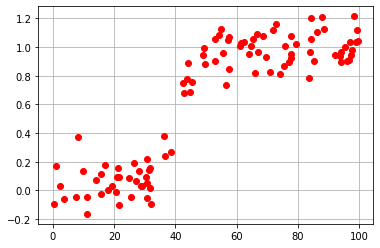

In [7]:
plt.plot(xdata, ydata, 'ro', alpha=1)
plt.grid()
plt.show()


So here each dot is a data point, a combination of $x$ together with a measurement of the corresponding $\sigma(x,\beta_1,\beta_2)$. Conclude that these measurements can not be 100% accurate. 

Below we will try to find estimates of $\beta_1,\beta_2$ to find an estimate $\hat{\sigma}$ for $\sigma$. 
The available data are the 100 data points of type $(x_i,\sigma(x_i,\beta_1,\beta_2)+\epsilon_i)$ that were used to create the above plot. So for $x$ values, the corresponding $y$ value is a function value $\sigma(x,\beta_1,\beta_2)$ plus noise. 

We will now try to find the values of the parameters $\beta_1,\beta_2)$ that fit the data best. In order to do so we need to solve an optimization problem.

Although we may define 'best' approximations in very different ways (see written Assignment 1), we here aim at minimizing the cost function 

$$C(\beta,X,Y)=\Vert Y-\sigma(X,\beta)\Vert^2 
$$

for the values in a data set $(X,Y)$. Note that here $\sigma(X)$ denotes a vector $(\sigma(x_1,\beta) \cdots \sigma(x_m,\beta))$ if $X=(x_1 \cdots x_m)$.
For the given data set with input values $X_{data}$ and corresponding function values $Y_{data}$, the relevant function becomes
  

$$\mathcal{L}(\beta)=\Vert Y_{data}-\sigma(X_{data},\beta)\Vert^2, 
$$

where $\sigma(\cdot,\beta)$ is applied to each coordinate in $X_{data}$.



In [8]:
## Graded Exercise
# Transform xdata to np.array X_data and ydata to np.array Y_data

X_data = np.array(xdata)
Y_data = np.array(ydata)

In [9]:
print(type(X_data))
print(type(Y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
'''test cell'''

'test cell'

Make sure you have the right types! 

In [11]:
# GRADED EXERCISE: define cost function


## Function ###
# Define function 'cost'
# cost(beta_param,x,y):
# input: beta_param (2,) vector
#        x numpy array, (m,) vector
#        y numpy array, (m,) vector
# output: the quantity specified in the explanation
def cost(beta_param,x,y):
    beta_1 = beta_param[0]
    beta_2 = beta_param[1]
    cost = np.linalg.norm(y - sigma(x, beta_1, beta_2))**2
    return(cost)


Check your function. For parameters $\beta=(1,1)$ and the given data, you should obtain a cost of 355492.73824173457. 

In [12]:
beta_param = [1,1]
cost(beta_param, X_data, Y_data)

32.07242082445513

In [13]:
'''Test-cell'''


'Test-cell'

In [14]:
# GRADED EXERCISE: define loss function
# Define function loss(beta_param)
# input vector beta_param with beta_1, beta_2 as coordinates
# output the total loss at the values

def loss(beta_param):
    beta_1 = beta_param[0]
    beta_2 = beta_param[1]
    loss = np.linalg.norm(Y_data - sigma(X_data, beta_1, beta_2))**2
    return(loss)
    

Check your function. At $\beta=(1,2)$ your loss should be around 31.37.

In [15]:
beta_param = [1,2]
loss(beta_param)

31.37419220027869

In [16]:
'''Test-cell'''


'Test-cell'

In [33]:
# GRADED EXERCISE: find the optimal values for beta

## Use scipy.minimize to optimize the loss function
# input: loss, use starting point [1,r]
# output: 'result' which is the scipy.minimize object
# output: 'beta_opt' (2,) vector of optimal values for beta_1,beta_2

result = spo.minimize(loss, [1,2], method="BFGS")
beta_opt = result.x

In [34]:
'''Test cell'''

'Test cell'

In [35]:
'''Run this one to see if your function does well..'''


'Run this one to see if your function does well..'

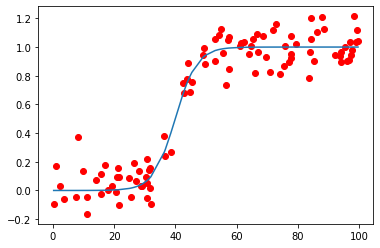

In [47]:
plt.plot(X_data, Y_data, 'ro')
b1 = beta_opt[0]
b2 = beta_opt[1]
plt.plot(X_data, sigma(X_data, b1, b2))
plt.show()

Check your solution. If you plot your estimated function with the data, do you get something like this?

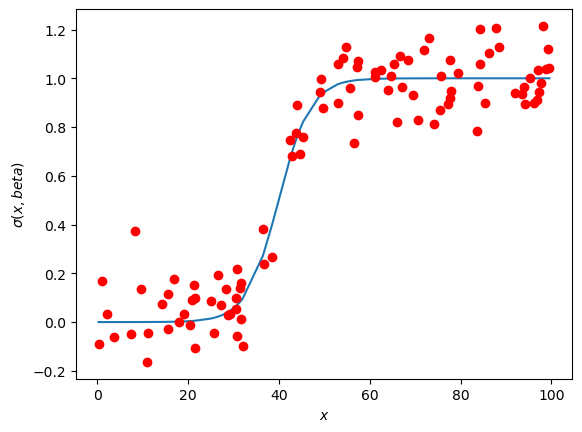

Now we will calculate the Hessian matrix $H\mathcal{L}$ at the solution you found to guarantee that indeed it minimizes loss. 

* Use <code> numdifftools </code> to evaluate the Hessian at the solution. 
* Use <code> np.linalg </code> to find the eigenvalues


In [22]:
# GRADED EXERCISE: check the Hessian at optimum

# Calculate the gradient and Hessian H at beta_opt.
# grad = 
# H =

fgrad = nd.Gradient(loss)
grad= fgrad(beta_opt)
fHess = nd.Hessian(loss)
H = fHess(beta_opt)

In [23]:
## GRADED EXERCISE

# Calculate the eigenvalues of H
#     eig =
# Characterize type of H
#     type = 'pos def' if positive definite
#     type = 'neg def' if negative definite
#     type = 'indefinite' if indefinite

eig, vectors = np.linalg.eig(H)
print(eig)
type = 'pos def'

[16.11386919  0.06605179]


Now suppose that your friend gives you additional information bout $\beta=(\beta_1,\beta_2)$, and that $\beta_1,\beta_2$ must be such that

* $\beta_1\geq 1$
* $\Vert\beta\Vert^2\leq 20$. 

Use <code>scipy.minimize</code> with starting point $\beta=(1,2)$ to find the optimal $\beta$ that minimizes the loss function subject to these constraints.  Use the 'SLSQP' solver. 

In [54]:
# GRADED EXERCISE: optimize given constraints on beta

# Write code, such that you obtain (2,) vector 'beta_restrict_opt' as the solution
#   write constraints as tuple 'cons'
#       cons = 
# Return object 'result_restricted'
#       result_restricted = 
# Get the optimal values
#       beta_restrict_opt = 

cons = ({'type': 'ineq', 'fun': lambda x: beta_param[0] - 1}, 
{'type': 'ineq', 'fun': lambda x: 20 - np.linalg.norm(beta_param)**2})
result_restricted = spo.minimize(loss, [1,2], method='SLSQP', constraints = cons)
beta_restrict_opt =  result_restricted.x

C:\Users\Simon\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [55]:
'''Testing your solution'''

'Testing your solution'

In [56]:
'''Visualize the solution and data points'''


'Visualize the solution and data points'

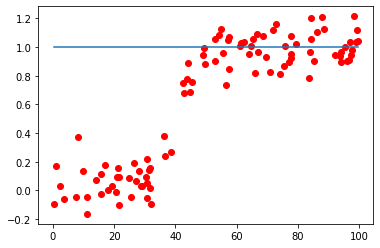

In [57]:
plt.plot(X_data, Y_data, 'ro')
b1r = beta_restrict_opt[0]
b2r = beta_restrict_opt[1]
plt.plot(X_data, sigma(X_data, b1r, b2r))
plt.show()
#The result is different, so he did not provide good information. 

Check your solution. Do you think your friend provided trustworthy information?
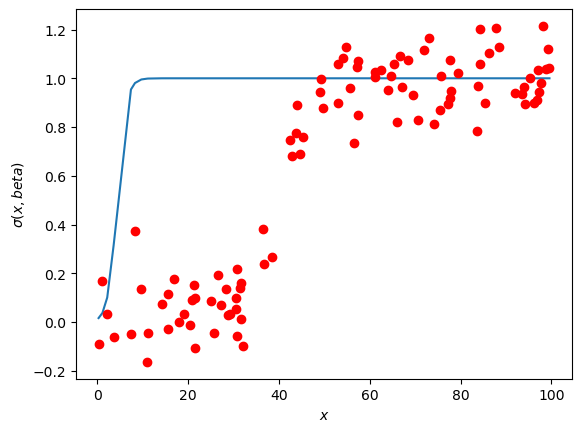